In [1041]:
import pandas as pd

In [1042]:
pd.__version__

'1.5.2'

In [1043]:
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1044]:
# Check data type of each column 

df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [1045]:
# Count total null values in each column 

df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [1046]:
# Check the name column for possible duplicate passengers 

print(f"{df.loc[df.Name.notnull()].Name.duplicated().sum()} Duplicate Names")

20 Duplicate Names


In [1047]:
# Get a list of the duplicate names

holder = df.loc[((df.Name.duplicated())&(df.Name.notnull()))].Name.to_list()
holder

['Elaney Webstephrey',
 'Sharie Gallenry',
 'Gollux Reedall',
 'Ankalik Nateansive',
 'Grake Porki',
 'Gwendy Sykess',
 'Troya Schwardson',
 'Glenna Valezaley',
 'Apix Wala',
 'Sus Coolez',
 'Dia Cartez',
 'Keitha Josey',
 'Cuses Pread',
 'Alraium Disivering',
 'Juane Popelazquez',
 'Loree Wolfernan',
 'Carry Contrevins',
 'Asch Stradick',
 'Glena Hahnstonsen',
 'Anton Woody']

In [1048]:
df.loc[df.Name=='Anton Woody']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2991,3236_03,Earth,False,E/200/P,TRAPPIST-1e,18.0,False,0.0,30.0,0.0,756.0,5.0,Anton Woody,False
8488,9071_01,Earth,False,F/1855/P,55 Cancri e,22.0,False,0.0,0.0,1072.0,46.0,3.0,Anton Woody,False


In [667]:
# I'm going to assume you're not supposed to get rid of duplicate names in this competition although i'm not sure. All the other features for the duplicate passengers have different values so i decided to keep them

In [667]:
# Let's seperate the dataframe into survivors and non survivors and do some data mining 

In [668]:
survive = df.loc[df.Transported==False]
nonsurvive = df.loc[df.Transported==True]

In [669]:
survive.head(0)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [670]:
survive.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4226.000000,4217.000000,4231.000000,4221.000000,4223.000000,4225.000000
mean,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
std,13.699262,875.638123,1200.115601,456.528126,1551.356047,1563.088368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,0.000000,4.000000,1.000000
75%,38.000000,473.000000,179.000000,95.000000,453.500000,388.000000
max,79.000000,14327.000000,16856.000000,10705.000000,22408.000000,24133.000000


In [671]:
nonsurvive.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4288.000000,4295.000000,4279.000000,4264.000000,4287.000000,4280.000000
mean,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131
std,15.151705,274.812497,1931.306995,722.026714,262.682871,291.658171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,78.000000,3992.000000,29813.000000,23492.000000,4103.000000,5063.000000


In [672]:
# - By looking at the mean of both groups you can see that survivors tend to have spent more on all amentities. Unless proven otherwise, it may be useful to reduce these five features into one for training our model

In [1049]:
# Other categorical features: Homeplanet, CryoSleep, Cabin, Destination, VIP, Name 

<AxesSubplot:title={'center':'Distribution of Survivors Homeplanet'}, ylabel='HomePlanet'>

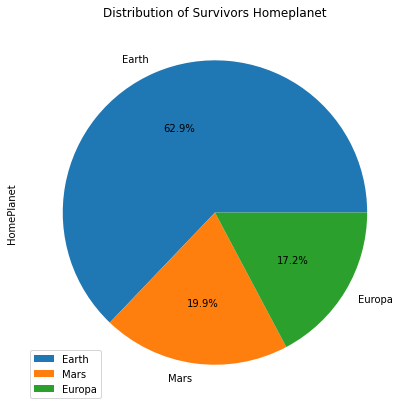

In [1050]:
survive.HomePlanet.value_counts().plot(kind='pie', title='Distribution of Survivors Homeplanet', legend=True, autopct="%.1f%%",figsize=(7,7))

<AxesSubplot:title={'center':'Distribution of NonSurvivors Homeplanet'}, ylabel='HomePlanet'>

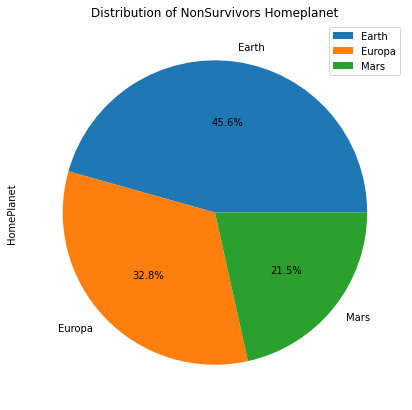

In [1051]:
# Distribution of NonSurvivors Homeplanet

nonsurvive.HomePlanet.value_counts().plot(kind='pie', title='Distribution of NonSurvivors Homeplanet', legend=True, autopct="%.1f%%",figsize=(7,7))

In [1053]:
# Most survivors were from earth. This will be a beneficial feature in our model

<AxesSubplot:title={'center':'Distribution of Survivors in CryoSleep'}, ylabel='CryoSleep'>

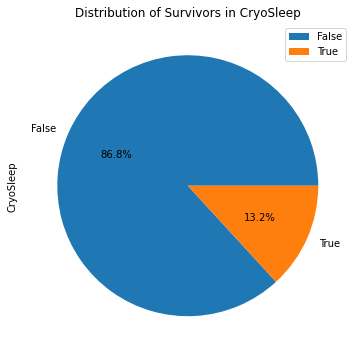

In [1054]:
# Distribution of CryoSleep among survivors 

survive.CryoSleep.value_counts().plot(kind='pie', title='Distribution of Survivors in CryoSleep', legend=True, autopct="%.1f%%",figsize=(6,6))

<AxesSubplot:title={'center':'Distribution of Non Survivors in CryoSleep'}, ylabel='CryoSleep'>

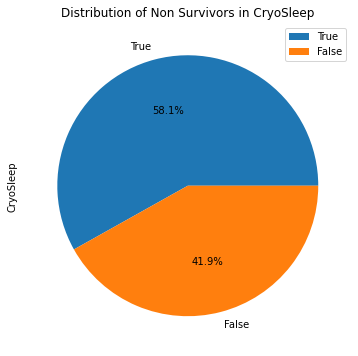

In [1055]:
# Distribution of CryoSleep among nonsurvivors

nonsurvive.CryoSleep.value_counts().plot(kind='pie', title='Distribution of Non Survivors in CryoSleep', legend=True, autopct="%.1f%%",figsize=(6,6))

In [1056]:
# Only 13% of our survivors were in Cryosleep. Veryuseful feature

In [1057]:
# Cabin Feature is labeled by Deck/Number/Side of Boat (Port or Starboard) as seen below

survive.Cabin.value_counts()

G/974/P     6
E/13/S      6
F/1194/P    6
G/734/S     5
G/292/S     5
           ..
B/96/P      1
G/475/S     1
F/629/P     1
C/115/S     1
E/608/S     1
Name: Cabin, Length: 3776, dtype: int64

In [1058]:
# Let's start by looking at the distribution of passengers on the starboard and port side for survivors and nonsurvivors 

print("Survivors\n")
print(f'Port Side: {survive.Cabin.str.contains("S").value_counts()[0]}')
print(f'Starboard Side: {survive.Cabin.str.contains("S").value_counts()[1]}')

Survivors

Port Side: 2308
Starboard Side: 1908


In [1059]:
print("Non Survivors\n")
print(f'Port Side: {nonsurvive.Cabin.str.contains("S").value_counts()[0]}')
print(f'Starboard Side: {nonsurvive.Cabin.str.contains("S").value_counts()[1]}')

Non Survivors

Port Side: 2380
Starboard Side: 1898


In [1060]:
# Being located on the port or starboard side don't seem to make much of a difference

In [1061]:
# Let's look further into the Cabin column to see if deck can be of any use 

In [1062]:
survive_cabin = survive.Cabin.to_list()
nonsurvive_cabin = nonsurvive.Cabin.to_list()

In [1065]:
for i in range(len(survive_cabin)):
    survive_cabin[i] = str(survive_cabin[i])
    survive_cabin[i] = survive_cabin[i][0]

for i in range(len(nonsurvive_cabin)):
    nonsurvive_cabin[i] = str(nonsurvive_cabin[i])
    nonsurvive_cabin[i] = nonsurvive_cabin[i][0]

In [1066]:
set(survive_cabin)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n'}

In [1067]:
set(nonsurvive_cabin)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n'}

<AxesSubplot:title={'center':'Distribution of Survivors Deck'}>

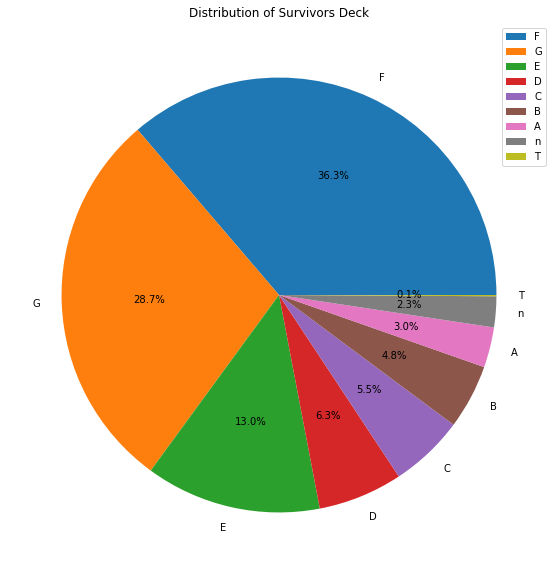

In [1068]:
pd.Series(survive_cabin).value_counts().plot(kind='pie', title='Distribution of Survivors Deck', legend=True, autopct="%.1f%%",figsize=(10,10))

<AxesSubplot:title={'center':'Distribution of Non Survivors Deck'}>

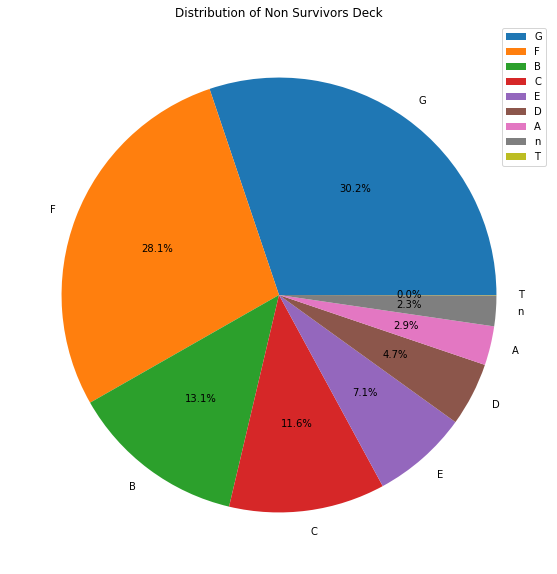

In [1069]:
pd.Series(nonsurvive_cabin).value_counts().plot(kind='pie', title='Distribution of Non Survivors Deck', legend=True, autopct="%.1f%%",figsize=(10,10))

In [1070]:
# There doesn't seem to be much of a distribution in deck among the survivors and non survivors. Let's check the last attribute of the Cabin column, number

In [1071]:
survive_cabin_num = survive.Cabin.to_list()
nonsurvive_cabin_num = nonsurvive.Cabin.to_list()

In [1072]:
# Transform Cabin numbers into a list for visualization

In [1073]:
for i in range(len(survive_cabin_num)):
    survive_cabin_num[i] = str(survive_cabin_num[i])

holder = "" 
i = 0 

for word in survive_cabin_num:
    for k in word: 
        if k.isdigit():
            holder += k 
    survive_cabin_num[i] = holder
    i += 1 
    holder = ""

In [1074]:
survive_cabin_num[:5]

['0', '0', '0', '1', '']

In [1075]:
for i in range(len(nonsurvive_cabin_num)):
    nonsurvive_cabin_num[i] = str(nonsurvive_cabin_num[i])

holder = "" 
i = 0 

for word in nonsurvive_cabin_num:
    for k in word: 
        if k.isdigit():
            holder += k 
    nonsurvive_cabin_num[i] = holder
    i += 1 
    holder = ""

In [1076]:
survive_cabin_num1 = []

for i in range(len(survive_cabin_num)):
    try:
        survive_cabin_num1.append(int(survive_cabin_num[i]))
    except:
        continue

In [1077]:
nonsurvive_cabin_num1 = []

for i in range(len(nonsurvive_cabin_num)):
    try:
        nonsurvive_cabin_num1.append(int(nonsurvive_cabin_num[i]))
    except:
        continue

<AxesSubplot:title={'center':'Distribution of Survivors Cabin Number'}, ylabel='Frequency'>

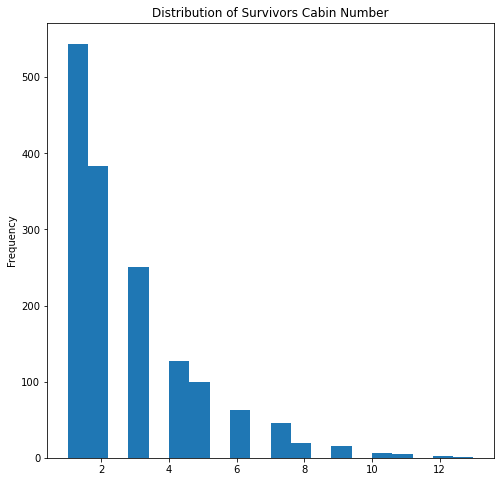

In [1078]:
pd.Series(survive_cabin_num1).value_counts().plot(kind='hist', title='Distribution of Survivors Cabin Number', bins=20, figsize=(8,8))

<AxesSubplot:title={'center':'Distribution of Non Survivors Cabin Number'}, ylabel='Frequency'>

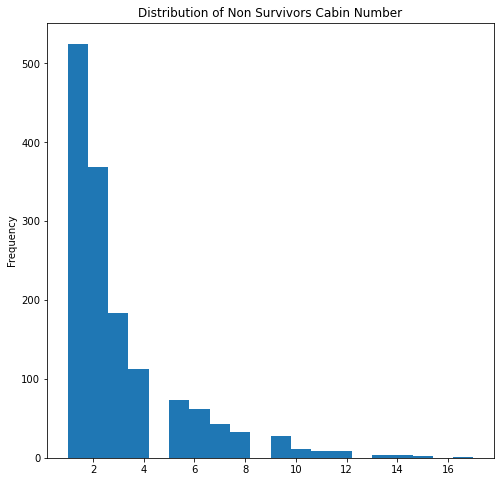

In [1079]:
pd.Series(nonsurvive_cabin_num1).value_counts().plot(kind='hist', title='Distribution of Non Survivors Cabin Number', bins=20, figsize=(8,8))

In [1080]:
# After looking at the three sub categories in the Cabin feature, deck/number/side of boat, i can't see any differences among the survivors and non survivors. Therefore i won't 
# be using this feature in our model 

In [1081]:
# Categories still to explore: Destination, VIP, Name

<AxesSubplot:title={'center':'Distribution of Survivors Destination '}, ylabel='Destination'>

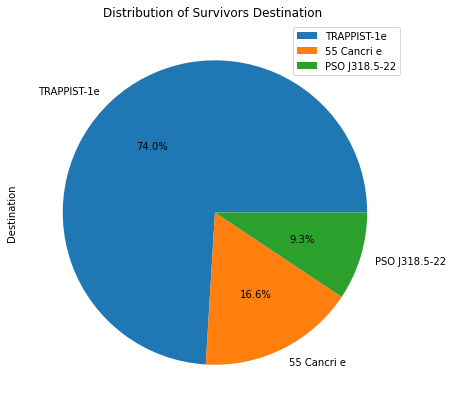

In [1082]:
survive.Destination.value_counts().plot(kind='pie', title='Distribution of Survivors Destination ', legend=True, autopct="%.1f%%",figsize=(7,7))

<AxesSubplot:title={'center':'Distribution of Non Survivors Destination'}, ylabel='Destination'>

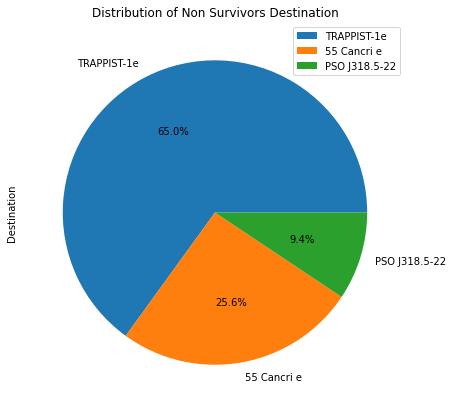

In [1083]:
nonsurvive.Destination.value_counts().plot(kind='pie', title='Distribution of Non Survivors Destination', legend=True, autopct="%.1f%%",figsize=(7,7))

In [1084]:
# Doesn't seem to be a useful feature

<AxesSubplot:title={'center':'Distribution of VIP among Survivors'}>

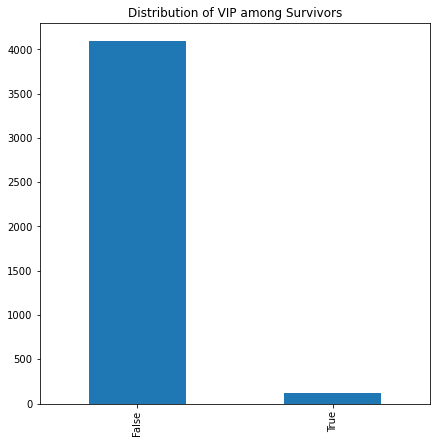

In [1085]:
survive.VIP.value_counts().plot(kind ='bar', title='Distribution of VIP among Survivors', figsize=(7,7))

<AxesSubplot:title={'center':'Distribution of VIP among Non Survivors'}>

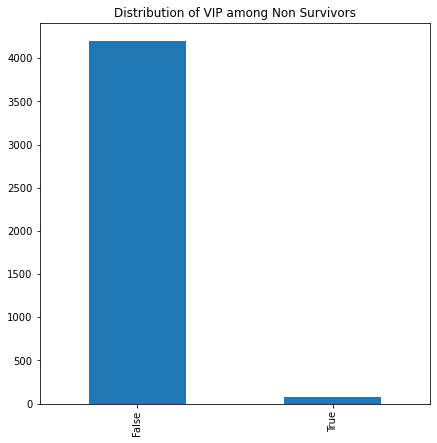

In [1089]:
nonsurvive.VIP.value_counts().plot(kind ='bar', title='Distribution of VIP among Non Survivors', figsize=(7,7))

In [1090]:
# Suprisingly, VIP doesn't seem to be a helpful feature 

In [1091]:
# There is a unique number after the _ for each passenger's passengerid spanning from 01-08. Let's see if it's of any use

df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1092]:
survive_id = survive.PassengerId.to_list()
nonsurvive_id = nonsurvive.PassengerId.to_list()

In [1093]:
survive_id[:5]

['0001_01', '0003_01', '0003_02', '0010_01', '0012_01']

In [1094]:
for i in range(len(survive_id)):
    holder = survive_id[i].split("_")
    survive_id[i] = holder[-1]

In [1095]:
for i in range(len(nonsurvive_id)):
    holder = nonsurvive_id[i].split("_")
    nonsurvive_id[i] = holder[-1]

<AxesSubplot:title={'center':'Unique ID number for Survivors'}>

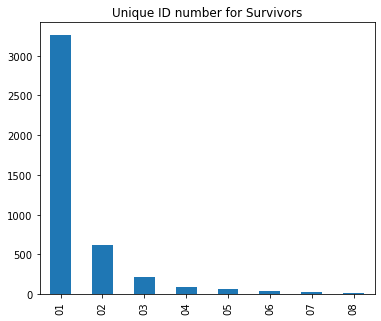

In [1096]:
pd.Series(survive_id).value_counts().plot(kind='bar',title='Unique ID number for Survivors', figsize=(6,5))

<AxesSubplot:title={'center':'Unique ID number for Non Survivors'}>

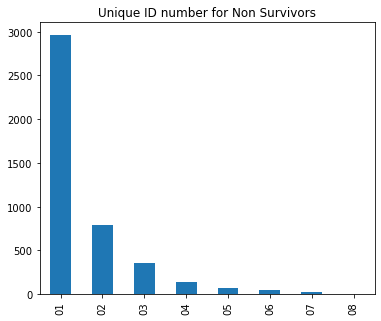

In [1097]:
pd.Series(nonsurvive_id).value_counts().plot(kind='bar',title='Unique ID number for Non Survivors', figsize=(6,5))

<AxesSubplot:title={'center':'Age Distribution of Survivors'}, ylabel='Frequency'>

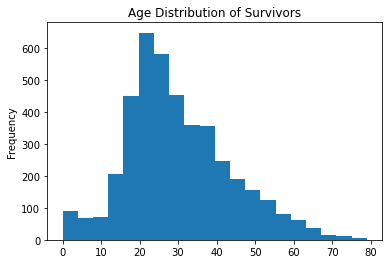

In [1098]:
survive.Age.plot(kind='hist',bins=20,title='Age Distribution of Survivors')

<AxesSubplot:title={'center':'Age Distribution of Non Survivors'}, ylabel='Frequency'>

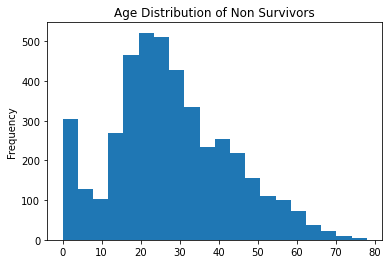

In [1100]:
nonsurvive.Age.plot(kind='hist',bins=20,title='Age Distribution of Non Survivors')

In [1101]:
# Based on the mining and exploration results i plan on using the HomePlanet, CryoSleep, and five amenity columns (which i'll be combining into one) for my features

In [1102]:
# Make an additional column that is the mean amount spent among the five amneities

In [1103]:
df['Amenity Total'] = None
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Amenity Total
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,None
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,None
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,None
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,None
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,None


In [1104]:
# Calculating the mean speant at all amentity services for each passenger

for i in range(len(df)):
    df.iloc[[i],[-1]] = (df.at[i,'RoomService'] + df.at[i,'FoodCourt'] + df.at[i,'ShoppingMall'] + df.at[i,'Spa'] + df.at[i,'VRDeck'])//5

C:\Users\Luke\AppData\Local\Temp\ipykernel_2648\1898292895.py:4: RuntimeWarning: invalid value encountered in double_scalars
  df.iloc[[i],[-1]] = (df.at[i,'RoomService'] + df.at[i,'FoodCourt'] + df.at[i,'ShoppingMall'] + df.at[i,'Spa'] + df.at[i,'VRDeck'])//5


In [1105]:
# Removing rows where Cryosleep and Homeplanet are null 

df = df.loc[((df.CryoSleep.notnull())&(df.HomePlanet.notnull()))]

In [1106]:
# Remove all the rows that have a null value for one of the amenities

df = df.loc[((df['RoomService'].notnull())&(df['FoodCourt'].notnull())&(df['ShoppingMall'].notnull())&(df['Spa'].notnull())&(df['VRDeck'].notnull()))]

In [1107]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Amenity Total
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,147.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2076.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1035.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,218.0


In [1108]:
# Roughly 7400 rows should be suffice for our training set. The initial amount of rows was around 8900 including null values

df.shape

(7411, 15)

In [1109]:
# Creating a new dataset with the features we'll be using for model building and our label

df1 = df[['HomePlanet','CryoSleep','Amenity Total','Transported']]

In [1110]:
# Re checking for nulls

df1.isnull().sum()

HomePlanet       0
CryoSleep        0
Amenity Total    0
Transported      0
dtype: int64

In [1111]:
df1 

,HomePlanet,CryoSleep,Amenity Total,Transported
0,Europa,False,0.0,False
1,Earth,False,147.0,True
2,Europa,False,2076.0,False
3,Europa,False,1035.0,False
4,Earth,False,218.0,True
...,...,...,...,...
8688,Europa,False,1707.0,False
8689,Earth,True,0.0,False
8690,Earth,False,374.0,True
8691,Europa,False,927.0,False


In [1112]:
# Now we need to encode the Home Planet, CryoSleep, and Transported features for our model. Being that the data is nominal for Home Planey and Cryosleep, we can use the pandas get dummies function 

In [1113]:
# Encoding HomePlanet Feature

df1 = pd.concat((df1,df1.HomePlanet.str.get_dummies()), axis=1)
df1.drop(['HomePlanet'],axis=1,inplace=True)
df1

,CryoSleep,Amenity Total,Transported,Earth,Europa,Mars
0,False,0.0,False,0,1,0
1,False,147.0,True,1,0,0
2,False,2076.0,False,0,1,0
3,False,1035.0,False,0,1,0
4,False,218.0,True,1,0,0
...,...,...,...,...,...,...
8688,False,1707.0,False,0,1,0
8689,True,0.0,False,1,0,0
8690,False,374.0,True,1,0,0
8691,False,927.0,False,0,1,0


In [1114]:
# Encode Cryosleep Feature (True and False)

df1['CryoSleep'] = df1['CryoSleep'].values.astype('str')
df1 = pd.concat((df1,df1.CryoSleep.str.get_dummies()),axis=1)
df1.drop(['CryoSleep'],axis=1,inplace=True)
df1

,Amenity Total,Transported,Earth,Europa,Mars,False,True
0,0.0,False,0,1,0,1,0
1,147.0,True,1,0,0,1,0
2,2076.0,False,0,1,0,1,0
3,1035.0,False,0,1,0,1,0
4,218.0,True,1,0,0,1,0
...,...,...,...,...,...,...,...
8688,1707.0,False,0,1,0,1,0
8689,0.0,False,1,0,0,0,1
8690,374.0,True,1,0,0,1,0
8691,927.0,False,0,1,0,1,0


In [1115]:
# Encode label. 0 = False, 1 = True

label_convert = df1['Transported'].astype('str').to_list()
label_convert[:5]

['False', 'True', 'False', 'False', 'True']

In [1116]:
for i in range(len(label_convert)):
    if label_convert[i]=='False':
        label_convert[i]=0
    else:
        label_convert[i]=1

In [1117]:
label_convert[:5]

[0, 1, 0, 0, 1]

In [1118]:
df1['Transported'] = label_convert
df1

,Amenity Total,Transported,Earth,Europa,Mars,False,True
0,0.0,0,0,1,0,1,0
1,147.0,1,1,0,0,1,0
2,2076.0,0,0,1,0,1,0
3,1035.0,0,0,1,0,1,0
4,218.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...
8688,1707.0,0,0,1,0,1,0
8689,0.0,0,1,0,0,0,1
8690,374.0,1,1,0,0,1,0
8691,927.0,0,0,1,0,1,0


In [1119]:
# Make sure all columns are integers or floats

df1.dtypes

Amenity Total    object
Transported       int64
Earth             int64
Europa            int64
Mars              int64
False             int64
True              int64
dtype: object

In [1120]:
# Change amentity total to int 

df1['Amenity Total'] = df1['Amenity Total'].astype('int')

In [1121]:
df1.dtypes

Amenity Total    int32
Transported      int64
Earth            int64
Europa           int64
Mars             int64
False            int64
True             int64
dtype: object

In [1122]:
# Now we will test train a Decision Tree, XG Boost, Logistic Regression, Random Forest, SVM, and Naive Bayes Categorical Algorithm for Predictions. The best will be used for final test

In [1123]:
# DECISION TREE

In [1124]:
# Divide data into features (X) and label (y) for model building 

y = df1['Transported']
X = df1.drop(['Transported'],axis=1)

In [1125]:
import sklearn,sklearn.tree
import sklearn.metrics as metrics

In [1126]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [1127]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1128]:
# Fitting Decision Tree Classification to the Training set
classifier = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [1129]:
import matplotlib.pyplot as plt

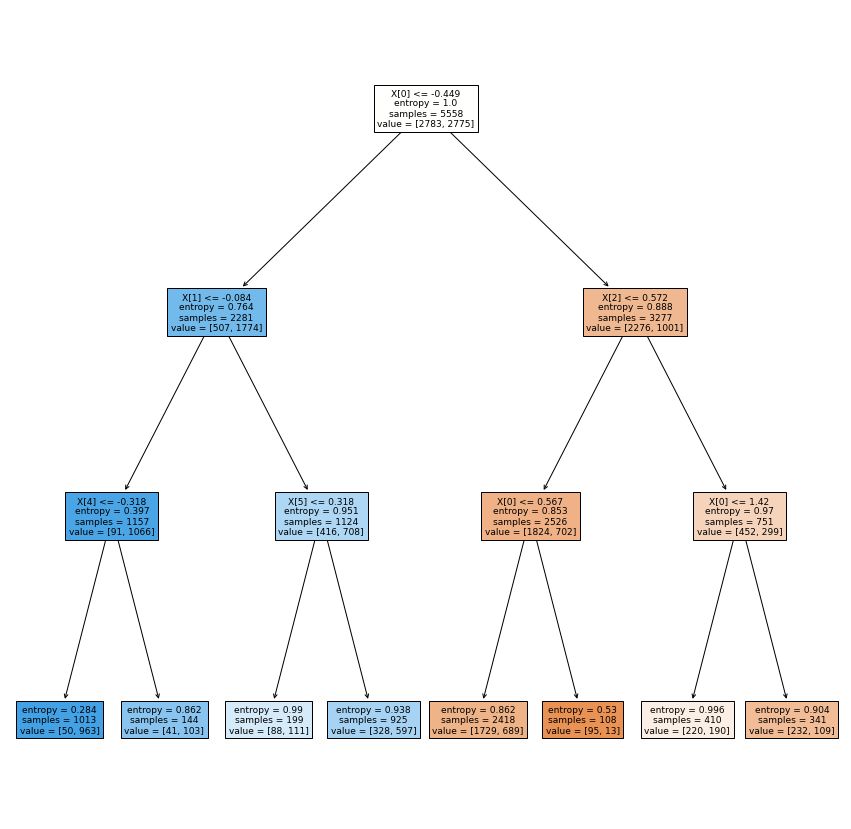

In [1130]:
# Display Decision Tree

plt.figure(figsize=(15,15))
sklearn.tree.plot_tree(classifier, filled=True)
plt.show()

In [1131]:
# Predicting the Test Set and Displaying Results

y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)

print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")
print("\nCONFUSION MATRIX\n")
pd.DataFrame(cm, columns=['Positive','Negative'],index=['Positive','Negative'])

Accuracy Score: 0.751
Recall: 0.679
Precision: 0.805

CONFUSION MATRIX



,Positive,Negative
Positive,745,156
Negative,306,646


In [1132]:
# XG BOOST

In [1133]:
# pip install --upgrade xgboost

In [1134]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [1135]:
# Predicting the Test Set and Displaying Results

y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)

print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")
print("\nCONFUSION MATRIX\n")
pd.DataFrame(cm, columns=['Positive','Negative'],index=['Positive','Negative'])

Accuracy Score: 0.744
Recall: 0.717
Precision: 0.768

CONFUSION MATRIX



,Positive,Negative
Positive,695,206
Negative,269,683


In [1136]:
# RANDOM FOREST 

In [1137]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, max_depth = 4,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10,
                       random_state=0)

In [1138]:
# Predicting the Test Set and Displaying Results

y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)

print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")
print("\nCONFUSION MATRIX\n")
pd.DataFrame(cm, columns=['Positive','Negative'],index=['Positive','Negative'])

Accuracy Score: 0.751
Recall: 0.679
Precision: 0.805

CONFUSION MATRIX



,Positive,Negative
Positive,745,156
Negative,306,646


In [1139]:
# SUPPORTED VECTOR MACHINE (SVM) 

In [1140]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [1141]:
# Predicting the Test Set and Displaying Results

y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)

print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")
print("\nCONFUSION MATRIX\n")
pd.DataFrame(cm, columns=['Positive','Negative'],index=['Positive','Negative'])

Accuracy Score: 0.74
Recall: 0.608
Precision: 0.842

CONFUSION MATRIX



,Positive,Negative
Positive,792,109
Negative,373,579


In [1142]:
# LOGISTIC REGRESSION 

In [1143]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [1144]:
# Predicting the Test Set and Displaying Results

y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)

print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")
print("\nCONFUSION MATRIX\n")
pd.DataFrame(cm, columns=['Positive','Negative'],index=['Positive','Negative'])

Accuracy Score: 0.724
Recall: 0.664
Precision: 0.768

CONFUSION MATRIX



,Positive,Negative
Positive,710,191
Negative,320,632


In [1145]:
# NAIVE BAYES 

In [1146]:
# Fitting Decision Tree Classification to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [1147]:
# Predicting the Test Set and Displaying Results

y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)

print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")
print("\nCONFUSION MATRIX\n")
pd.DataFrame(cm, columns=['Positive','Negative'],index=['Positive','Negative'])

Accuracy Score: 0.747
Recall: 0.624
Precision: 0.843

CONFUSION MATRIX



,Positive,Negative
Positive,790,111
Negative,358,594


In [1148]:
# After analyzing the results of the supervised categorical algorithms, i'm going to go with a 3 layered random forest algorithm

In [1165]:
# Importing test data 

test = pd.read_csv('test.csv')

In [1166]:
test.shape

(4277, 13)

In [1167]:
# Check for Null Values in Our Test Set

In [1168]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [1169]:
test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [1170]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [1188]:
# Fill missing numeric values with column average

test = test.fillna(test.mean(numeric_only=True))
test.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            100
Destination       92
Age                0
VIP               93
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name              94
Amenity Total    455
dtype: int64

In [1189]:
import random

In [1190]:
# Now for the remaining null values in the HomePlanet and CryoSleep columns.

# I'm going to run a loop that test if cryosleep is true for corresponding home planet values that are null. If so i'm going to make 
# the homeplanet Europa, as being in cryosleep is the leading indicator of not surviving, and being on Europa is arguably the worst planet 
# to come from. Conversly, if cryosleep is null, and earth is not the corresponding homeplanet value, i'll set cryosleep to true being that 
# most survivors are from earth. I'll fill in the remaining null values with random values by using the random library 

In [1191]:
# Loop for null HomePlanet values

choices=['Earth','Mars','Europa']

for i in range(len(test)): # Looping through test dataframe 
    holder = test.iloc[[i],[1]].isnull() # Testing if cell in HomePlanet column is null 
    holder1 = holder.at[i,'HomePlanet'] # Saving result to a variable 
    if holder1==True: # If result is true, ie. HomePlanet cell is null 
        if test.at[i,'CryoSleep']==True: # If corresponding Cryosleep cell is true
            test.iloc[[i],[1]]='Europa' # Set planet to Europa 
        else: # else
            test.iloc[[i],[1]]=random.choices(choices,k=1)[0] # set planet to a random planet from our choices list

In [1192]:
# Loop for null CryoSleep values

choices = [True,False]

for i in range(len(test)):
    holder = test.iloc[[i],[2]].isnull()
    holder1 = holder.at[i,'CryoSleep']
    if holder1==True:
        if test.at[i,'HomePlanet']=='Earth':
            test.iloc[[i],[2]]=False 
        else:
            test.iloc[[i],[2]]=random.choices(choices,k=1)[0]

In [1193]:
test.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            100
Destination       92
Age                0
VIP               93
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name              94
Amenity Total    455
dtype: int64

In [1194]:
# Adding Amenity Average Feature to replace 5 sub categories 

test['Amenity Total'] = None

for i in range(len(test)):
    test.iloc[[i],[-1]] = (test.at[i,'RoomService'] + test.at[i,'FoodCourt'] + test.at[i,'ShoppingMall'] + test.at[i,'Spa'] + test.at[i,'VRDeck'])//5

In [1195]:
test1 = test[['HomePlanet','CryoSleep','Amenity Total']]
test1 

,HomePlanet,CryoSleep,Amenity Total
0,Earth,True,0.0
1,Earth,False,566.0
2,Europa,True,0.0
3,Europa,False,1483.0
4,Earth,False,129.0
...,...,...,...
4272,Earth,True,0.0
4273,Earth,False,203.0
4274,Mars,True,0.0
4275,Europa,False,640.0


In [1196]:
# Encode Home Planet Data

test1 = pd.concat((test1,test1.HomePlanet.str.get_dummies()), axis=1)
test1.drop(['HomePlanet'],axis=1,inplace=True)
test1 

,CryoSleep,Amenity Total,Earth,Europa,Mars
0,True,0.0,1,0,0
1,False,566.0,1,0,0
2,True,0.0,0,1,0
3,False,1483.0,0,1,0
4,False,129.0,1,0,0
...,...,...,...,...,...
4272,True,0.0,1,0,0
4273,False,203.0,1,0,0
4274,True,0.0,0,0,1
4275,False,640.0,0,1,0


In [1197]:
# Encode Cryosleep column

test1['CryoSleep'] = test1['CryoSleep'].values.astype('str')
test1 = pd.concat((test1,test1.CryoSleep.str.get_dummies()),axis=1)
test1.drop(['CryoSleep'],axis=1,inplace=True)
test1

,Amenity Total,Earth,Europa,Mars,False,True
0,0.0,1,0,0,0,1
1,566.0,1,0,0,1,0
2,0.0,0,1,0,0,1
3,1483.0,0,1,0,1,0
4,129.0,1,0,0,1,0
...,...,...,...,...,...,...
4272,0.0,1,0,0,0,1
4273,203.0,1,0,0,1,0
4274,0.0,0,0,1,0,1
4275,640.0,0,1,0,1,0


In [1198]:
test1.dtypes

Amenity Total    object
Earth             int64
Europa            int64
Mars              int64
False             int64
True              int64
dtype: object

In [1199]:
test1['Amenity Total'] = test1['Amenity Total'].astype('int')

In [1200]:
test1.dtypes

Amenity Total    int32
Earth            int64
Europa           int64
Mars             int64
False            int64
True             int64
dtype: object

In [1201]:
test1.isnull().sum()

Amenity Total    0
Earth            0
Europa           0
Mars             0
False            0
True             0
dtype: int64

In [1202]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, max_depth = 4,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10,
                       random_state=0)

In [1203]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[745, 156],
       [306, 646]], dtype=int64)

In [1204]:
accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)
print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")

Accuracy Score: 0.751
Recall: 0.679
Precision: 0.805


In [1205]:
final_test = sc.transform(test1)

In [1206]:
y_pred = classifier.predict(final_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [1207]:
test['Transported'] = y_pred
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Amenity Total,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,566.0,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1483.0,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,129.0,0


In [1208]:
# Transforming predictions back into True/False values for Kaggle Submission

for i in range(len(test)):
    if test.at[i,'Transported']==1:
        test.iloc[[i],[-1]]=True
    else:
        test.iloc[[i],[-1]]=False

In [1209]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Amenity Total,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,566.0,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1483.0,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,129.0,False


In [1210]:
# Selecting only passengerId and predicted value for export 

test = test[['PassengerId','Transported']]
test.head(10)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
5,0027_01,False
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,False


In [1211]:
test.to_csv('sample_submission.csv',index=False)